In [52]:
# import annexe as an
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', None)
FICHIER1 ='C:/Users/pierr/Documents/OC/projet4/2015-building-energy-benchmarking.csv/2015-building-energy-benchmarking.csv'
FICHIER2 ='C:/Users/pierr/Documents/OC/projet4/2016-building-energy-benchmarking.csv/2016-building-energy-benchmarking.csv'

In [2]:
energy_comsumption_2015 = pd.read_csv(FICHIER1,low_memory=False)
energy_comsumption_2016 = pd.read_csv(FICHIER2,low_memory=False)

In [3]:
energy_comsumption_2015.shape

(3340, 47)

In [4]:
energy_comsumption_2016.shape

(3376, 46)

In [5]:
energy_comsumption_2015.columns.difference(energy_comsumption_2016.columns)

Index(['2010 Census Tracts', 'City Council Districts', 'Comment', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Location', 'OtherFuelUse(kBtu)', 'SPD Beats', 'Seattle Police Department Micro Community Policing Plan Areas', 'Zip Codes'], dtype='object')

In [6]:
energy_comsumption_2016.columns.difference(energy_comsumption_2015.columns)

Index(['Address', 'City', 'Comments', 'GHGEmissionsIntensity', 'Latitude', 'Longitude', 'State', 'TotalGHGEmissions', 'ZipCode'], dtype='object')

['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes']

In [7]:
display(energy_comsumption_2015.head(2))

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}'}",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081


In [8]:
for column in energy_comsumption_2015.columns:
    display(column,energy_comsumption_2015[column].value_counts(),print('\n'))

'OSEBuildingID'

19774    1
19855    1
19671    1
23769    1
49943    1
        ..
23158    1
633      1
23162    1
21115    1
25170    1
Name: OSEBuildingID, Length: 3340, dtype: int64

None

'DataYear'

2015    3340
Name: DataYear, dtype: int64

None

'BuildingType'

NonResidential          1461
Multifamily LR (1-4)    1029
Multifamily MR (5-9)     554
Multifamily HR (10+)     107
SPS-District K-12         99
Nonresidential COS        68
Campus                    22
Name: BuildingType, dtype: int64

None

'PrimaryPropertyType'

Low-Rise Multifamily           998
Mid-Rise Multifamily           539
Small- and Mid-Sized Office    297
Other                          258
Non-Refrigerated Warehouse     187
Large Office                   171
K-12 School                    136
Mixed Use Property             126
High-Rise Multifamily          103
Retail Store                   100
Hotel                           73
Worship Facility                72
Distribution Center\n           51
Senior Care Community           43
Medical Office                  43
Supermarket/Grocery Store       36
Self-Storage Facility\n         27
College/University              22
Residence Hall/Dormitory        15
Refrigerated Warehouse          13
Restaurant\n                    11
Hospital                        10
SPS-District K-12                4
Distribution Center              2
Laboratory                       1
Restaurant                       1
Self-Storage Facility            1
Name: PrimaryPropertyType, dtype: int64

None

'PropertyName'

WAREHOUSE                       9
OFFICE BUILDING                 8
CLOVERDALE BUSINESS PARK        5
APARTMENTS                      4
KENYON BUSINESS PARK            3
                               ..
LAUREN RENEE                    1
LESLEY MANOR                    1
MULHOLLAND APARTMENTS           1
BROADWAY AND E PIKE BUILDING    1
NORTHPARK VILLA                 1
Name: PropertyName, Length: 3287, dtype: int64

None

'TaxParcelIdentificationNumber'

3224049012    5
2400002       5
925049346     5
7666203240    4
8632880000    4
             ..
6169900166    1
1976700010    1
1988200240    1
2426039037    1
659000380     1
Name: TaxParcelIdentificationNumber, Length: 3245, dtype: int64

None

'Location'

{'latitude': '47.52593209', 'longitude': '-122.3308402', 'human_address': '{"address": "309 S CLOVERDALE ST", "city": "SEATTLE", "state": "WA", "zip": "98108"}'}              5
{'latitude': '47.66375728', 'longitude': '-122.3002168', 'human_address': '{"address": "2623 NE UNIVERSITY VILLAGE ST", "city": "SEATTLE", "state": "WA", "zip": "98105"}'}    5
{'latitude': '47.5829049', 'longitude': '-122.3228994', 'human_address': '{"address": "2203 AIRPORT WAY S", "city": "SEATTLE", "state": "WA", "zip": "98134"}'}                4
{'latitude': '47.52131741', 'longitude': '-122.3668974', 'human_address': '{"address": "2600 SW BARTON ST", "city": "SEATTLE", "state": "WA", "zip": "98126"}'}                4
{'latitude': '47.5616226', 'longitude': '-122.3386303', 'human_address': '{"address": "4634 E MARGINAL WAY S", "city": "SEATTLE", "state": "WA", "zip": "98134"}'}             3
                                                                                                                   

None

'CouncilDistrictCode'

7    1037
3     584
2     507
4     344
5     343
1     280
6     245
Name: CouncilDistrictCode, dtype: int64

None

'Neighborhood'

DOWNTOWN                 578
EAST                     444
MAGNOLIA / QUEEN ANNE    420
GREATER DUWAMISH         369
NORTHEAST                259
LAKE UNION               249
NORTHWEST                226
NORTH                    188
SOUTHWEST                165
CENTRAL                  131
BALLARD                  130
SOUTHEAST                 96
DELRIDGE                  85
Name: Neighborhood, dtype: int64

None

'YearBuilt'

2000    72
2008    69
1989    67
1968    65
1999    65
1988    64
2001    61
2002    60
1990    60
1910    58
1900    56
1969    56
1970    56
1979    55
1928    54
1925    53
2014    51
1960    49
2013    49
1980    49
1985    48
1967    46
2006    45
1926    45
1962    44
2007    43
1978    43
1966    43
1991    42
1963    42
1987    41
1986    41
2005    40
2009    40
1998    40
1930    40
1997    37
1965    37
2004    36
1961    36
1981    35
1929    34
2012    33
1909    33
2003    32
1984    32
1907    31
1992    31
1964    30
1958    29
1908    29
1982    29
1996    29
1994    29
1959    27
1916    27
1971    26
1974    25
1927    25
1977    25
1920    25
1956    24
1983    24
2010    24
1948    23
1914    23
1973    23
1975    23
1993    22
1995    22
1923    22
1924    22
1954    22
1976    21
1922    21
1955    21
1957    21
1906    20
1950    20
1953    20
1912    18
1949    18
1952    18
1972    16
1951    16
1904    16
1947    14
1917    13
2011    13
1911    12
1913    12

None

'NumberofBuildings'

1     3321
2        5
6        3
3        3
7        3
4        1
10       1
16       1
11       1
39       1
Name: NumberofBuildings, dtype: int64

None

'NumberofFloors'

3.0     701
4.0     700
1.0     451
2.0     444
6.0     299
5.0     289
7.0     133
8.0      60
11.0     32
10.0     31
13.0     20
12.0     18
9.0      18
14.0     12
17.0      9
15.0      8
18.0      7
24.0      7
16.0      7
33.0      6
26.0      6
42.0      6
23.0      6
19.0      6
25.0      5
0.0       5
27.0      5
21.0      5
20.0      4
22.0      4
29.0      3
37.0      2
28.0      2
36.0      2
41.0      2
34.0      2
31.0      2
39.0      1
30.0      1
32.0      1
47.0      1
63.0      1
76.0      1
38.0      1
55.0      1
40.0      1
99.0      1
46.0      1
49.0      1
56.0      1
Name: NumberofFloors, dtype: int64

None

'PropertyGFATotal'

21600     9
36000     8
25920     8
28800     7
24000     6
         ..
109623    1
30840     1
243044    1
52228     1
161789    1
Name: PropertyGFATotal, Length: 3150, dtype: int64

None

'PropertyGFAParking'

0         2416
13320        3
25920        3
6300         2
100176       2
          ... 
13700        1
1416         1
15755        1
42380        1
6133         1
Name: PropertyGFAParking, Length: 908, dtype: int64

None

'PropertyGFABuilding(s)'

 21600      9
 25920      8
 36000      7
 28800      7
 24000      6
           ..
-50550      1
 28808      1
 20565      1
 48505      1
 1023998    1
Name: PropertyGFABuilding(s), Length: 3145, dtype: int64

None

'ListOfAllPropertyUseTypes'

Multifamily Housing                                                                                                                                                                               862
Multifamily Housing, Parking                                                                                                                                                                      406
K-12 School                                                                                                                                                                                       133
Office                                                                                                                                                                                            132
Office, Parking                                                                                                                                                                                   112
Non-Refrig

None

'LargestPropertyUseType'

Multifamily Housing                                     1598
Office                                                   479
Non-Refrigerated Warehouse                               194
K-12 School                                              136
Other                                                    104
Retail Store                                              99
Worship Facility                                          70
Hotel                                                     68
Distribution Center                                       52
Medical Office                                            43
Senior Care Community                                     42
Supermarket/Grocery Store                                 37
Parking                                                   28
Self-Storage Facility                                     27
College/University                                        21
Other - Entertainment/Public Assembly                     20
Other - Recreation      

None

'LargestPropertyUseTypeGFA'

24000.0     9
22000.0     9
30000.0     8
21600.0     8
20000.0     8
           ..
60732.0     1
35123.0     1
204794.0    1
35115.0     1
77800.0     1
Name: LargestPropertyUseTypeGFA, Length: 2979, dtype: int64

None

'SecondLargestPropertyUseType'

Parking                                            881
Office                                             204
Retail Store                                       155
Other                                               57
Restaurant                                          43
Non-Refrigerated Warehouse                          35
Multifamily Housing                                 16
Supermarket/Grocery Store                           14
Data Center                                         13
Medical Office                                      12
Other - Services                                    12
Fitness Center/Health Club/Gym                      10
Other - Entertainment/Public Assembly                9
Swimming Pool                                        8
Distribution Center                                  7
K-12 School                                          6
Laboratory                                           6
Bank Branch                                          6
Other - Re

None

'SecondLargestPropertyUseTypeGFA'

0.0        111
5000.0      13
7200.0      13
6000.0      12
15000.0     10
          ... 
11999.0      1
29723.0      1
13883.0      1
16412.0      1
5500.0       1
Name: SecondLargestPropertyUseTypeGFA, Length: 1270, dtype: int64

None

'ThirdLargestPropertyUseType'

Retail Store                                            107
Office                                                  100
Parking                                                  64
Restaurant                                               54
Other                                                    53
Swimming Pool                                            25
Non-Refrigerated Warehouse                               18
Medical Office                                           17
Social/Meeting Hall                                      11
Food Service                                             11
Multifamily Housing                                      10
Data Center                                              10
Other - Restaurant/Bar                                    8
Bank Branch                                               6
Financial Office                                          5
Other - Entertainment/Public Assembly                     5
Fitness Center/Health Club/Gym          

None

'ThirdLargestPropertyUseTypeGFA'

0.0         44
6000.0       7
5000.0       6
3000.0       5
1000.0       4
2000.0       4
4000.0       3
6200.0       3
1500.0       3
2500.0       3
1250.0       3
9000.0       3
4579.0       2
2700.0       2
7000.0       2
4500.0       2
9100.0       2
3400.0       2
3700.0       2
4596.0       2
9680.0       2
7200.0       2
8644.0       1
3692.0       1
4878.0       1
2408.0       1
909.0        1
4116.0       1
4312.0       1
18799.0      1
80000.0      1
10611.0      1
1469.0       1
2516.0       1
5594.0       1
2247.0       1
6015.0       1
6570.0       1
597.0        1
5515.0       1
1440.0       1
103200.0     1
13320.0      1
23244.0      1
3750.0       1
5306.0       1
7553.0       1
15011.0      1
4085.0       1
9455.0       1
606.0        1
16956.0      1
17656.0      1
50000.0      1
2240.0       1
11533.0      1
634.0        1
2571.0       1
4722.0       1
13528.0      1
10095.0      1
25747.0      1
1564.0       1
30744.0      1
8770.0       1
13567.0      1
18130.0   

None

'YearsENERGYSTARCertified'

2016                                                                                        20
2016, 2015                                                                                   8
2014                                                                                         6
2009                                                                                         4
2015, 2014                                                                                   3
2013                                                                                         3
2016, 2015, 2014                                                                             3
2015                                                                                         3
2016, 2009, 2008                                                                             2
2011                                                                                         2
2009, 2005                                        

None

'ENERGYSTARScore'

100.0    106
95.0      79
94.0      70
97.0      60
99.0      59
81.0      56
93.0      56
98.0      54
89.0      54
85.0      52
86.0      52
91.0      51
92.0      50
88.0      49
83.0      48
84.0      46
90.0      44
77.0      44
79.0      43
1.0       42
87.0      41
82.0      41
96.0      40
65.0      40
80.0      37
74.0      36
69.0      36
72.0      35
71.0      32
73.0      32
61.0      32
68.0      31
57.0      29
78.0      28
52.0      28
60.0      28
75.0      26
67.0      26
76.0      26
70.0      25
59.0      25
64.0      24
48.0      23
54.0      23
62.0      22
51.0      22
55.0      21
30.0      20
56.0      19
42.0      19
49.0      18
58.0      18
28.0      18
66.0      18
27.0      17
50.0      17
45.0      16
19.0      16
34.0      16
43.0      16
44.0      15
39.0      15
53.0      14
35.0      14
63.0      14
31.0      13
18.0      13
41.0      13
46.0      13
8.0       13
22.0      13
33.0      13
14.0      12
23.0      12
11.0      12
40.0      11
4.0       11

None

'SiteEUI(kBtu/sf)'

27.2     18
28.5     16
29.3     16
29.6     16
27.9     15
         ..
129.6     1
139.1     1
210.1     1
4.9       1
81.4      1
Name: SiteEUI(kBtu/sf), Length: 1072, dtype: int64

None

'SiteEUIWN(kBtu/sf)'

29.7     15
29.6     15
26.5     14
32.3     14
25.0     14
         ..
205.8     1
285.8     1
6.0       1
67.7      1
81.4      1
Name: SiteEUIWN(kBtu/sf), Length: 1115, dtype: int64

None

'SourceEUI(kBtu/sf)'

65.7     9
78.6     9
78.4     9
68.4     9
81.3     9
        ..
133.5    1
169.8    1
13.6     1
204.4    1
732.5    1
Name: SourceEUI(kBtu/sf), Length: 1673, dtype: int64

None

'SourceEUIWN(kBtu/sf)'

0.0      12
99.0      9
84.8      8
73.3      8
107.3     8
         ..
164.4     1
238.4     1
31.2      1
38.1      1
103.8     1
Name: SourceEUIWN(kBtu/sf), Length: 1687, dtype: int64

None

'SiteEnergyUse(kBtu)'

0.0          2
2074152.0    2
784584.0     2
767213.0     2
335382.0     1
            ..
7782092.0    1
1312005.0    1
696522.0     1
1206065.0    1
1358652.0    1
Name: SiteEnergyUse(kBtu), Length: 3326, dtype: int64

None

'SiteEnergyUseWN(kBtu)'

0.0          12
4332347.0     1
663592.0      1
1649396.0     1
2385958.0     1
             ..
815612.0      1
2825578.0     1
329960.0      1
3962332.0     1
564940.0      1
Name: SiteEnergyUseWN(kBtu), Length: 3319, dtype: int64

None

'SteamUse(kBtu)'

0.0            3200
448146.0          1
1663608.0         1
4403788.0         1
14770295.0        1
23458518.0        1
5426396.0         1
780000.0          1
595133.0          1
604443.0          1
798277.0          1
584488.0          1
703184.0          1
3900000.0         1
3623542.0         1
1583463.0         1
642693.0          1
505677.0          1
122701720.0       1
3274333.0         1
162514.0          1
1145000.0         1
20278584.0        1
1755365.0         1
232000.0          1
9756039.0         1
1270000.0         1
1099052.0         1
1698709.0         1
4898180.0         1
1002406.0         1
383274.0          1
184557.0          1
3984262.0         1
1975527.0         1
47648276.0        1
2148584.0         1
1578661.0         1
138504.0          1
21474092.0        1
1050707.0         1
627140.0          1
1058012.0         1
216792.0          1
486182.0          1
1648136.0         1
368153.0          1
2359521.0         1
5973700.0         1
759621.0          1


None

'Electricity(kWh)'

0.0          2
221628.0     2
340715.0     2
3010885.0    1
207775.0     1
            ..
1050804.0    1
310367.0     1
354827.0     1
533760.0     1
181507.0     1
Name: Electricity(kWh), Length: 3327, dtype: int64

None

'Electricity(kBtu)'

0.0          2
1980139.0    1
796803.0     1
883665.0     1
1099003.0    1
            ..
6525840.0    1
2446696.0    1
2424966.0    1
649395.0     1
984659.0     1
Name: Electricity(kBtu), Length: 3329, dtype: int64

None

'NaturalGas(therms)'

0.0        1256
2.0           3
7584.0        3
4789.0        3
10.0          3
           ... 
4118.0        1
10424.0       1
4367.0        1
1967.0        1
8328.0        1
Name: NaturalGas(therms), Length: 1995, dtype: int64

None

'NaturalGas(kBtu)'

0.0          1256
92348.0         2
220582.0        2
625162.0        1
1282585.0       1
             ... 
1529648.0       1
1230296.0       1
679623.0        1
178346.0        1
269432.0        1
Name: NaturalGas(kBtu), Length: 2073, dtype: int64

None

'OtherFuelUse(kBtu)'

0.0          3313
12551.0         1
2944419.0       1
145944.0        1
229942.0        1
337952.0        1
182715.0        1
15527.0         1
547.0           1
1943011.0       1
8269669.0       1
427938.0        1
5596.0          1
177849.0        1
6464408.0       1
178094.0        1
2304567.0       1
143134.0        1
Name: OtherFuelUse(kBtu), dtype: int64

None

'GHGEmissions(MetricTonsCO2e)'

4.65      8
3.54      6
4.55      6
3.47      6
6.71      5
         ..
80.99     1
81.27     1
391.32    1
70.78     1
49.68     1
Name: GHGEmissions(MetricTonsCO2e), Length: 2763, dtype: int64

None

'GHGEmissionsIntensity(kgCO2e/ft2)'

0.06     258
0.07     206
0.05     154
0.08     146
0.09      81
0.10      71
0.11      51
0.04      46
0.12      42
0.14      35
0.13      32
0.03      31
0.17      28
0.02      27
0.24      24
0.56      23
0.18      23
0.15      21
0.48      20
0.55      20
0.45      19
0.76      19
0.51      18
0.64      18
0.59      18
0.16      18
0.23      18
0.65      18
0.34      17
0.63      17
0.22      16
0.47      16
0.19      16
0.28      16
0.27      16
0.89      16
0.38      16
0.30      16
0.01      16
0.68      15
0.43      15
0.49      15
0.50      15
0.31      15
0.88      15
0.46      15
0.61      15
0.67      14
0.66      14
0.72      14
0.36      14
0.86      14
0.80      14
0.73      14
0.53      14
0.21      14
0.75      13
0.40      13
0.20      13
0.52      13
0.82      13
1.12      13
0.97      13
0.54      13
0.35      13
0.91      13
0.32      12
1.05      12
0.60      12
0.33      12
0.62      12
0.37      12
0.71      12
0.74      12
0.57      11
0.94      11
0.70      11

None

'DefaultData'

No     2791
Yes     548
Name: DefaultData, dtype: int64

None

'Comment'

Part of McKinstry’s campus, this remodeled warehouse is mainly office but includes a full-size basketball court and gym with locker rooms, bistro with a full kitchen, and data center. Served by rooftop package units for heating and cooling. Upgrades inclu    1
Part of McKinstry's campus, property includes a warehouse, a local pipe supplier, and a local insulation contractor.  Learn more at www.mckinstry.com.                                                                                                             1
Property now has two buildings: Thornton Creek Elementary School and the Decatur Building. New Thornton Creek Elementary built on Decatur Property and under construction from 6/2013 - 9/2016.                                                                    1
Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1949 to 2016.                                                                     

None

'ComplianceStatus'

Compliant        3337
Not Compliant       3
Name: ComplianceStatus, dtype: int64

None

'Outlier'

High Outlier    46
Low Outlier     38
Name: Outlier, dtype: int64

None

'2010 Census Tracts'

123.0    48
117.0    34
122.0    26
116.0    23
119.0    23
134.0    19
127.0    14
131.0    11
135.0    10
124.0     9
125.0     4
129.0     2
118.0     1
Name: 2010 Census Tracts, dtype: int64

None

'Seattle Police Department Micro Community Policing Plan Areas'

50.0    342
8.0     239
56.0    218
14.0    209
46.0    172
19.0    142
60.0    141
57.0    132
5.0     131
22.0    107
4.0      99
29.0     83
33.0     80
53.0     80
49.0     78
27.0     71
55.0     65
20.0     64
6.0      63
1.0      60
9.0      60
61.0     45
23.0     42
17.0     38
2.0      33
41.0     30
54.0     29
59.0     29
3.0      28
42.0     28
28.0     28
35.0     27
37.0     27
32.0     23
38.0     21
7.0      21
45.0     20
24.0     18
44.0     17
31.0     17
51.0     16
36.0     16
58.0     15
25.0     14
47.0     12
10.0     12
16.0     12
34.0     11
40.0     10
11.0     10
26.0      7
43.0      7
12.0      6
15.0      6
21.0      5
48.0      5
52.0      5
18.0      4
13.0      4
30.0      3
39.0      1
Name: Seattle Police Department Micro Community Policing Plan Areas, dtype: int64

None

'City Council Districts'

1.0    139
2.0     74
Name: City Council Districts, dtype: int64

None

'SPD Beats'

40.0    198
5.0     127
9.0     124
10.0    124
12.0    117
36.0    115
39.0    114
7.0     113
38.0    102
27.0     84
22.0     84
48.0     82
19.0     81
4.0      79
1.0      78
28.0     77
49.0     75
50.0     74
35.0     73
26.0     73
20.0     73
11.0     71
2.0      71
47.0     68
3.0      64
30.0     64
37.0     58
24.0     57
6.0      51
31.0     51
16.0     50
32.0     50
33.0     50
34.0     46
17.0     40
21.0     39
29.0     38
25.0     36
15.0     36
42.0     35
13.0     35
51.0     35
18.0     32
8.0      29
41.0     29
45.0     27
44.0     26
43.0     24
14.0     24
23.0     20
46.0     15
Name: SPD Beats, dtype: int64

None

'Zip Codes'

18390    309
18379    259
19578    238
18081    234
18383    189
19584    182
19576    180
19575    164
18376    163
18377    158
19579    155
18388    135
19582    124
18792    124
18386    106
18795     94
17919     93
18800     90
18789     72
18235     70
18385     62
19581     62
18798     31
17916     29
18229      7
17920      4
18230      3
17926      2
17923      1
Name: Zip Codes, dtype: int64

None

OSEBuildingID,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),
no_wanted = ["PropertyName","Location"]

# Just numbers variables

In [9]:
just_numbers_values_2015 = energy_comsumption_2015.select_dtypes(include=np.number)

In [10]:
just_numbers_values_2015.columns.to_list()

['OSEBuildingID',
 'DataYear',
 'CouncilDistrictCode',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [11]:
correlation_matric_2015 = just_numbers_values_2015.corr(method='pearson')

In [12]:
correlation_matric_2015.style.background_gradient(cmap='coolwarm')

C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
OSEBuildingID,1.000000,nan,-0.092519,0.134578,-0.000676,-0.113519,-0.268611,-0.179414,-0.261334,-0.252482,-0.223600,-0.180031,0.074262,-0.148349,-0.135939,-0.175447,-0.164757,-0.233614,-0.227312,-0.068027,-0.267634,-0.267634,-0.094450,-0.094450,-0.059625,-0.142120,-0.039979,-0.176414,-0.033749,0.124239,-0.005494,0.051580
DataYear,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CouncilDistrictCode,-0.092519,nan,1.000000,-0.023185,-0.025065,0.243339,0.143526,0.152531,0.124161,0.116951,0.156437,0.062676,0.066326,0.066411,0.059433,0.078232,0.075340,0.084376,0.082095,0.013071,0.102873,0.102873,0.029263,0.029263,0.036443,0.042012,0.017191,0.485333,0.087212,-0.207675,-0.185280,-0.062987
YearBuilt,0.134578,nan,-0.023185,1.000000,-0.004222,0.142683,0.181080,0.248852,0.141241,0.159239,0.197615,0.103654,0.011589,-0.008990,-0.025789,0.057837,0.051472,0.085684,0.081467,0.001868,0.110454,0.110454,0.028143,0.028143,-0.022980,0.035245,-0.159084,-0.098275,0.077662,-0.087911,0.075032,0.037048
NumberofBuildings,-0.000676,nan,-0.025065,-0.004222,1.000000,-0.017514,0.262966,0.033448,0.294679,0.260629,0.130486,-0.023896,-0.023697,0.027440,0.029103,0.026978,0.027914,0.194295,0.211656,-0.003271,0.167999,0.167999,0.245667,0.245667,-0.001656,0.165773,0.017461,nan,0.009453,nan,-0.008761,0.026347
NumberofFloors,-0.113519,nan,0.243339,0.142683,-0.017514,1.000000,0.596612,0.445613,0.567785,0.579017,0.502411,0.306378,0.012372,0.015420,0.002801,0.040549,0.032039,0.343528,0.327366,0.096026,0.411062,0.411062,0.107321,0.107321,0.011808,0.191113,-0.033674,-0.050518,-0.118129,0.098660,-0.105375,-0.129517
PropertyGFATotal,-0.268611,nan,0.143526,0.181080,0.262966,0.596612,1.000000,0.648706,0.978159,0.954736,0.822816,0.618700,0.056831,0.106480,0.087989,0.127974,0.111642,0.678425,0.662026,0.284826,0.697844,0.697844,0.381319,0.381319,0.062270,0.518440,0.022912,-0.060000,-0.025815,0.031495,-0.065763,-0.071756
PropertyGFAParking,-0.179414,nan,0.152531,0.248852,0.033448,0.445613,0.648706,1.000000,0.476348,0.553280,0.551182,0.414223,0.079775,0.086773,0.072167,0.127134,0.117201,0.326776,0.315039,0.012191,0.390832,0.390832,0.165459,0.165459,0.005551,0.166104,-0.056237,-0.037596,-0.002896,0.020086,-0.086471,-0.070496
PropertyGFABuilding(s),-0.261334,nan,0.124161,0.141241,0.294679,0.567785,0.978159,0.476348,1.000000,0.951616,0.801731,0.612501,0.044616,0.099318,0.081945,0.113127,0.096971,0.694545,0.678805,0.325735,0.699484,0.699484,0.395353,0.395353,0.070426,0.553595,0.041830,-0.056313,-0.029034,0.029523,-0.052361,-0.063648
LargestPropertyUseTypeGFA,-0.252482,nan,0.116951,0.159239,0.260629,0.579017,0.954736,0.553280,0.951616,1.000000,0.776318,0.459681,0.056182,0.084313,0.068482,0.094334,0.079677,0.705917,0.694755,0.346079,0.696225,0.696225,0.426108,0.426107,0.081979,0.583793,0.052804,-0.072255,-0.025979,-0.014297,-0.048277,-0.060120


In [13]:
def good_or_bad_correlation(correlation_matrix,dataframe_correlate):
    correlation_columns = []
    for num,column in enumerate(correlation_matrix.columns):
        for row1 in correlation_matrix.columns[num+1:]:
            comptnan = 0
            comptvalues  = 0
            if correlation_matrix[column][row1] >= 0.99:
                print("-------------------------------------------------------------------------------")
                if ((dataframe_correlate[column].notna()) & (dataframe_correlate[row1].notna())).sum() > 25:
                    display(dataframe_correlate[((dataframe_correlate[column].notna()) & (dataframe_correlate[row1].notna()))][[column,row1]].head(5))
                    display(dataframe_correlate[((dataframe_correlate[column].isna()) & (dataframe_correlate[row1].notna()))][[column,row1]].head(5))
                    display(dataframe_correlate[((dataframe_correlate[column].notna()) & (dataframe_correlate[row1].isna()))][[column,row1]].head(5))
                    correlation_columns += [[column,row1]]
                else:
                    print("Fausse correlation de 1 pour ",column," and ",row1) 
    return(correlation_columns)

In [14]:
correlation_columns = good_or_bad_correlation(correlation_matric_2015,just_numbers_values_2015)

-------------------------------------------------------------------------------


,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf)
0,78.9,80.3
1,94.4,99.0
2,96.6,99.7
3,460.4,462.5
4,120.1,122.1


,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf)


,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf)


-------------------------------------------------------------------------------


,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf)
0,173.5,175.1
1,191.3,195.2
2,242.7,246.5
3,636.3,643.2
4,228.8,227.1


,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf)


,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf)


-------------------------------------------------------------------------------


,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu)
0,6981428.0,7097539.0
1,8354235.0,8765788.0
2,73130656.0,75506272.0
3,28229320.0,28363444.0
4,14829099.0,15078243.0


,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu)


,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu)


-------------------------------------------------------------------------------


,Electricity(kWh),Electricity(kBtu)
0,1080307.0,3686160.0
1,1144563.0,3905411.0
2,14583930.0,49762435.0
3,811521.0,2769023.0
4,1777841.0,6066245.0


,Electricity(kWh),Electricity(kBtu)


,Electricity(kWh),Electricity(kBtu)


-------------------------------------------------------------------------------


,NaturalGas(therms),NaturalGas(kBtu)
0,12724.0,1272388.0
1,44490.0,4448985.0
2,37099.0,3709900.0
3,20019.0,2001894.0
4,87631.0,8763105.0


,NaturalGas(therms),NaturalGas(kBtu)


,NaturalGas(therms),NaturalGas(kBtu)


In [15]:
correlation_columns

[['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)'],
 ['SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)'],
 ['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)'],
 ['Electricity(kWh)', 'Electricity(kBtu)'],
 ['NaturalGas(therms)', 'NaturalGas(kBtu)']]

In [16]:
not_wanted_columns_2015 = [x[1] for x in correlation_columns] + ['OSEBuildingID','DataYear']

In [17]:
just_numbers_values_2015_clean = just_numbers_values_2015.drop([x[1] for x in correlation_columns],1)

In [18]:
just_numbers_values_2015_clean

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,7,1927,1,12.0,88434,0,88434,88434.0,NaN,NaN,65.0,78.9,173.5,6981428.0,2023032.0,1080307.0,12724.0,0.0,249.43,2.64,NaN,14.0,NaN,31.0,18081
1,2,2015,7,1996,1,11.0,103566,15064,88502,83880.0,15064.0,4622.0,51.0,94.4,191.3,8354235.0,0.0,1144563.0,44490.0,0.0,263.51,2.38,NaN,14.0,NaN,31.0,18081
2,3,2015,7,1969,1,41.0,961990,0,961990,757243.0,100000.0,0.0,18.0,96.6,242.7,73130656.0,19660404.0,14583930.0,37099.0,0.0,2061.48,1.92,NaN,56.0,NaN,31.0,18081
3,5,2015,7,1926,1,10.0,61320,0,61320,61320.0,NaN,NaN,1.0,460.4,636.3,28229320.0,23458518.0,811521.0,20019.0,0.0,1936.34,31.38,NaN,56.0,NaN,31.0,18081
4,8,2015,7,1980,1,18.0,119890,12460,107430,123445.0,68009.0,0.0,67.0,120.1,228.8,14829099.0,0.0,1777841.0,87631.0,0.0,507.70,4.02,NaN,56.0,NaN,31.0,19576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,2,2000,1,4.0,44650,0,44650,44650.0,NaN,NaN,71.0,25.6,80.4,1142949.0,0.0,334979.0,0.0,0.0,7.97,0.07,NaN,26.0,NaN,16.0,18379
3336,50055,2015,4,2014,1,7.0,42393,0,42393,31748.0,NaN,NaN,98.0,48.6,124.2,1543282.0,0.0,325705.0,4320.0,0.0,30.69,0.61,NaN,60.0,NaN,38.0,18383
3337,50057,2015,7,2015,1,40.0,319481,41915,277566,NaN,NaN,NaN,79.0,52.7,93.1,16834414.0,0.0,1690364.0,110669.0,0.0,627.97,1.89,NaN,56.0,NaN,7.0,19576
3338,50058,2015,4,1981,1,3.0,48230,0,48230,22310.0,NaN,NaN,44.0,34.8,109.4,777064.0,0.0,227744.0,0.0,0.0,5.42,0.04,NaN,55.0,NaN,48.0,18792


In [19]:
just_numbers_values_2015_clean2 = just_numbers_values_2015_clean.drop(['OSEBuildingID','DataYear','CouncilDistrictCode','ENERGYSTARScore','SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kWh)','NaturalGas(therms)','OtherFuelUse(kBtu)','GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)','2010 Census Tracts','Seattle Police Department Micro Community Policing Plan Areas','City Council Districts','SPD Beats','Zip Codes'],1)

In [20]:
just_numbers_values_2015_clean2.sample(4)

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
1333,1930,1,2.0,45960,0,45960,45960.0,NaN,NaN
2052,1989,1,4.0,64195,15230,48965,48965.0,15230.0,NaN
2399,1963,1,4.0,28472,0,28472,28472.0,NaN,NaN
3182,2011,1,1.0,51400,0,51400,51841.0,0.0,NaN


In [21]:
just_numbers_values_2015_clean3 = just_numbers_values_2015_clean2.fillna(0)

In [22]:
just_numbers_values_2015_clean3[just_numbers_values_2015_clean3.isna() == True]

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
just_numbers_values_2015_clean2 = just_numbers_values_2015_clean.drop(['OSEBuildingID','DataYear','CouncilDistrictCode','ENERGYSTARScore','SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kWh)','NaturalGas(therms)','OtherFuelUse(kBtu)','GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)','2010 Census Tracts','Seattle Police Department Micro Community Policing Plan Areas','City Council Districts','SPD Beats','Zip Codes'],1)
just_numbers_values_2015_clean3 = just_numbers_values_2015_clean2.fillna(0)
X = just_numbers_values_2015_clean3.values
# print(X)
y = just_numbers_values_2015_clean['Electricity(kWh)'].fillna(0).values

# Not numbers variables

In [25]:
just_string_values_2015 = energy_comsumption_2015[energy_comsumption_2015.columns.difference(just_numbers_values_2015.columns)]

In [27]:
just_string_values_2015.sample(3)

,BuildingType,Comment,ComplianceStatus,DefaultData,LargestPropertyUseType,ListOfAllPropertyUseTypes,Location,Neighborhood,Outlier,PrimaryPropertyType,PropertyName,SecondLargestPropertyUseType,TaxParcelIdentificationNumber,ThirdLargestPropertyUseType,YearsENERGYSTARCertified
2897,Multifamily LR (1-4),NaN,Compliant,Yes,Multifamily Housing,"Multifamily Housing, Retail Store","{'latitude': '47.61387248', 'longitude': '-122.3224312', 'human_address': '{""address"": ""725 E PIKE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98122""}'}",EAST,High Outlier,Low-Rise Multifamily,ST JOHNS APT & STORE,Retail Store,7502500061,NaN,NaN
2006,Multifamily LR (1-4),NaN,Compliant,No,Multifamily Housing,"Multifamily Housing, Parking","{'latitude': '47.6951736', 'longitude': '-122.3173017', 'human_address': '{""address"": ""9100 ROOSEVELT WAY NE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98115""}'}",NORTH,NaN,Low-Rise Multifamily,MARCO APTS,Parking,5100403256,NaN,NaN
1381,Multifamily LR (1-4),NaN,Compliant,Yes,Multifamily Housing,"Multifamily Housing, Parking","{'latitude': '47.62643124', 'longitude': '-122.325699', 'human_address': '{""address"": ""745 SUMMIT AVE E"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98102""}'}",EAST,NaN,Low-Rise Multifamily,SUMMIT VIEW,Parking,2163900350,NaN,NaN


In [28]:
not_numbers_columns_kept = ["BuildingType","LargestPropertyUseType","Neighborhood","PrimaryPropertyType","SecondLargestPropertyUseType","ThirdLargestPropertyUseType","YearsENERGYSTARCertified"]

In [32]:
string_variables_2015 = just_string_values_2015[not_numbers_columns_kept]

In [69]:
dummies = pd.get_dummies(string_variables_2015)

In [73]:
print(dummies.shape)
print(just_numbers_values_2015_clean3.shape)

(3340, 252)
(3340, 9)


In [58]:
dataframe_2015_with_dummies = just_numbers_values_2015_clean3.join(dummies)#.filter(regex="^(?!.*_other)")

In [72]:
# regex = re.compile(".*" + "ther" + ".*")
# column_list = list(filter(regex.match, dataframe_2015_with_dummies.columns))
# print(column_list)

# Linear regression sklearn

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import seaborn as sns 
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# std_scale = preprocessing.StandardScaler().fit(X_train)
# X_train_std = std_scale.transform(X_train)
# X_test_std = std_scale.transform(X_test)

In [77]:
def cross_validation_scores(y_values):
    sns.set(style="white", rc={"lines.linewidth": 3})
    sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y=y_values)
    plt.show()
    sns.set()

In [92]:
std_scale = preprocessing.StandardScaler().fit(X)

In [111]:
def accuracy_skf_linear_regression(X,y,standard_scale,algorythm,**args):
    skf = StratifiedKFold()
    accuracy_model = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        if standard_scale:
            X_train_std = std_scale.transform(X_train)
            X_test_std = std_scale.transform(X_test)
            model_skf = algorythm(**args).fit(X_train_std, y_train)
            accuracy_model.append(model_skf.score(X_test_std, y_test)*100)
        else:
            model_skf = algorythm(**args).fit(X_train, y_train)
            accuracy_model.append(model_skf.score(X_test, y_test)*100)
    cross_validation_scores([round(abs(ele),2) for ele in accuracy_model])

## KFold LinearRegression

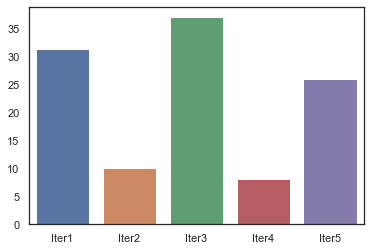

In [93]:
accuracy_model = []
kf = KFold()
std_scale = preprocessing.StandardScaler().fit(X)
for train_index, test_index in kf.split(X, y):
#     print(train_index)
#     print(test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    model_kf = LinearRegression().fit(X_train_std, y_train)
    accuracy_model.append(model_kf.score(X_test_std, y_test)*100)
#     print(accuracy_model)
#     print(model_kf.score(X_test_std, y_test))
# print([round(abs(ele),2) for ele in accuracy_model])
cross_validation_scores([round(abs(ele),2) for ele in accuracy_model])

## StratifiedKFold LinearRegression

C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


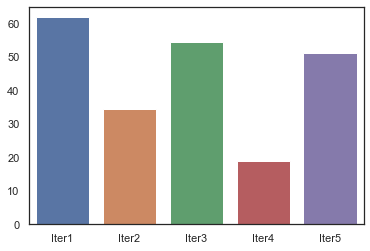

In [112]:
accuracy_skf_linear_regression(X,y,True,LinearRegression)

## StratifiedKFold ElasticNetCV

C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


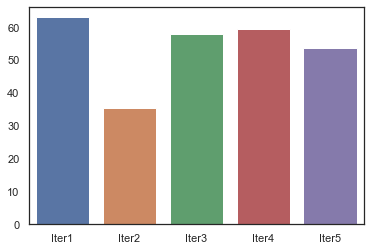

In [116]:
accuracy_skf_linear_regression(X,y,False,ElasticNetCV,fit_intercept = True)

## StratifiedKFold ElasticNet

C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


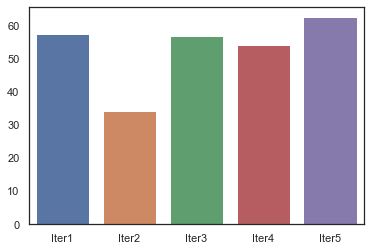

In [31]:
skf2 = StratifiedKFold()
accuracy_model = []
for train_index, test_index in skf2.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    model_skf = ElasticNet().fit(X_train_std, y_train)
    accuracy_model.append(model_skf.score(X_test_std, y_test)*100)
#     print(model_skf.score(X_test_std, y_test))
cross_validation_scores([round(abs(ele),2) for ele in accuracy_model])

## StratifiedKFold Ridge

C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


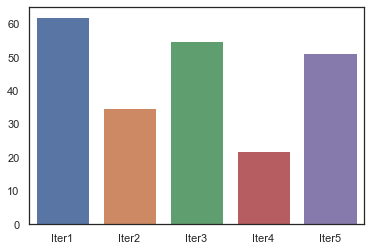

In [32]:
skf2 = StratifiedKFold()
accuracy_model = []
for train_index, test_index in skf2.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    clf = Ridge(alpha=1.0)
    clf.fit(X_train_std, y_train)
    accuracy_model.append(clf.score(X_test_std, y_test)*100)
#     clf.predict(X_test_std)
#     print(clf.score(X_test_std, y_test))
cross_validation_scores([round(abs(ele),2) for ele in accuracy_model])

## StratifiedKFold Lasso

C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115934465016618.0, tolerance: 2118991518976.9797
  model = cd_fast.enet_coordinate_descent(
C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62299658343694.5, tolerance: 1388864896010.0676
  model = cd_fast.enet_coordinate_descent(
C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Ob

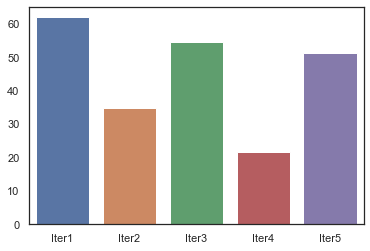

In [33]:
skf2 = StratifiedKFold()
accuracy_model = []
for train_index, test_index in skf2.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    clf = Lasso(alpha=0.1,normalize=True)
    clf.fit(X_train_std, y_train)
    accuracy_model.append(clf.score(X_test_std, y_test)*100)
#     clf.predict(X_test_std)
#     print(clf.score(X_test_std, y_test))
cross_validation_scores([round(abs(ele),2) for ele in accuracy_model])

## StratifiedKFold MLPRegressor

C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pier

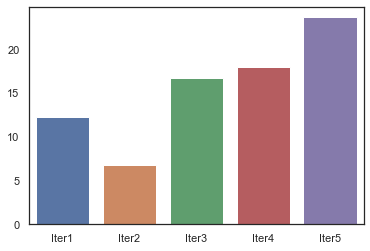

In [34]:
skf2 = StratifiedKFold()
accuracy_model = []
for train_index, test_index in skf2.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
#     solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
    regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train_std, y_train)
    accuracy_model.append(regr.score(X_test_std, y_test)*100)
cross_validation_scores([round(abs(ele),2) for ele in accuracy_model])

## StratifiedKFold DecisionTreeClassifier

C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[ 1080307.  1144563. 14583930. ...  1690364.   227744.   283229.]
************
[ 1080307.  1144563. 14583930. ...  1690364.   227744.   283229.]
************
[ 1080307.  1144563. 14583930. ...  1690364.   227744.   283229.]
************
[ 1080307.  1144563. 14583930. ...  1690364.   227744.   283229.]
************
[ 1080307.  1144563. 14583930. ...  1690364.   227744.   283229.]
************


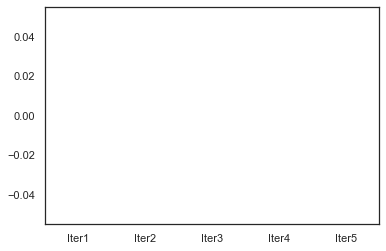

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# cross_val_score(clf, iris.data, iris.target, cv=10)


skf2 = StratifiedKFold()
accuracy_model = []
for train_index, test_index in skf2.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    clf = DecisionTreeClassifier(random_state=0).fit(X_train_std, y_train)
    accuracy_model.append(clf.score(X_test_std, y_test)*100)
cross_validation_scores([round(abs(ele),2) for ele in accuracy_model])

## StratifiedKFold RandomForestClassifier

C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


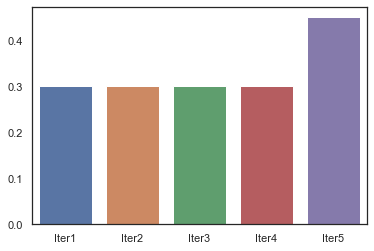

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# >>> clf = RandomForestClassifier(max_depth=2, random_state=0)
# >>> clf.fit(X, y)
# RandomForestClassifier(...)
# >>> print(clf.predict([[0, 0, 0, 0]]))

skf2 = StratifiedKFold()
accuracy_model = []
for train_index, test_index in skf2.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_std, y_train)
    accuracy_model.append(clf.score(X_test_std, y_test)*100)
cross_validation_scores([round(abs(ele),2) for ele in accuracy_model])

## StratifiedKFold KNeighborsClassifier

C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


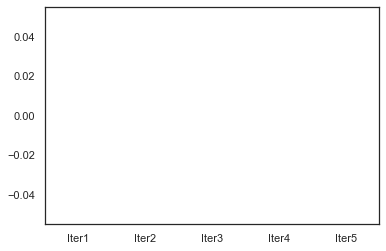

In [37]:
from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=3)
# >>> neigh.fit(X, y)
# KNeighborsClassifier(...)
# >>> print(neigh.predict([[1.1]]))
# [0]
# >>> print(neigh.predict_proba([[0.9]]))

skf2 = StratifiedKFold()
accuracy_model = []
for train_index, test_index in skf2.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train_std, y_train)
    accuracy_model.append(neigh.score(X_test_std, y_test)*100)
cross_validation_scores([round(abs(ele),2) for ele in accuracy_model])

## StratifiedKFold support vector machines

C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


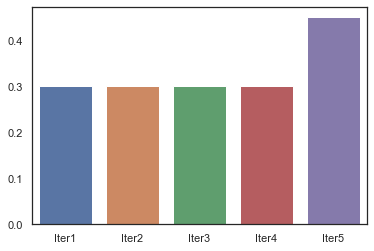

In [38]:
from sklearn import svm
# >>> X = [[0, 0], [1, 1]]
# >>> y = [0, 1]
# >>> clf = svm.SVC()
# >>> clf.fit(X, y)

skf2 = StratifiedKFold()
accuracy_model = []
for train_index, test_index in skf2.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    neigh = svm.SVC().fit(X_train_std, y_train)
    accuracy_model.append(neigh.score(X_test_std, y_test)*100)
cross_validation_scores([round(abs(ele),2) for ele in accuracy_model])

In [37]:
for train_index, test_index in kf.split(X, y):
    model_skf = ElasticNetCV().fit(X, y)
    print(model_skf.score(X, y))

0.5034458698808317
0.5034458698808317
0.5034458698808317
0.5034458698808317
0.5034458698808317


In [ ]:

import numpy as np
>>> from sklearn.model_selection import StratifiedKFold
>>> X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
>>> y = np.array([0, 0, 1, 1])
>>> skf = StratifiedKFold(n_splits=2)
>>> skf.get_n_splits(X, y)
2
>>> print(skf)
StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
>>> for train_index, test_index in skf.split(X, y):
...     print("TRAIN:", train_index, "TEST:", test_index)
...     X_train, X_test = X[train_index], X[test_index]
...     y_train, y_test = y[train_index], y[test_index]

In [14]:
model_skf = LinearRegression().fit(X, y)
model_skf.score(X, y)

0.5052521118935236

In [19]:
model_skf = ElasticNetCV(cv=StratifiedKFold(5))
model_skf.fit(X, y)

C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\pierr\anaconda3\envs\projet4\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


ElasticNetCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False))

In [18]:
y.shape


(3340,)

In [21]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
pandas getdummys
sklearn label encoder

tester sans les variables de categories, avec les categori et dummy, et categorie avec label réfléchi
regarder ce que je peux faire en linear regression avec sklearn

kfold,stratified_kfold (pour melanger les set de données pour test et validation)